In [1]:
# Connecitng the google drive for data set
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [10]:
# Importing the library
import numpy as np
import pandas as pd

import PIL
import os


import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras import regularizers


import matplotlib.pyplot as plt

In [11]:
# Checking the count of the image in the train and test data set
import pathlib
r_p = '/content/gdrive/MyDrive/Ankit_Project'
train_data = pathlib.Path(r_p + '/Train')
test_data = pathlib.Path(r_p + '/Test')
count_train = len(list(train_data.glob('*/*.jpg')))
print(count_train)
count_test = len(list(test_data.glob('*/*.jpg')))
print(count_test)

2239
118


Creating data set

In [12]:
# fixing the batch size and the make train_da for training 

batch_size = 32
height = 180
width = 180

train_da = tf.keras.preprocessing.image_dataset_from_directory(train_data, validation_split=0.1, subset="training", seed=54,image_size=(height, width), batch_size=32)

Found 2239 files belonging to 9 classes.
Using 2016 files for training.


In [13]:
# Making tensorflow.python.data.ops.dataset_ops  data set for the validation and the test data set

val_da = tf.keras.preprocessing.image_dataset_from_directory(train_data, validation_split=0.1, subset="validation", seed=89,image_size=(height, width), batch_size=32)

test_da = tf.keras.preprocessing.image_dataset_from_directory(test_data, image_size=(height, width), batch_size=batch_size)

class_names = train_da.class_names
print(class_names)


Found 2239 files belonging to 9 classes.
Using 223 files for validation.
Found 118 files belonging to 9 classes.
['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


Analysing data 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


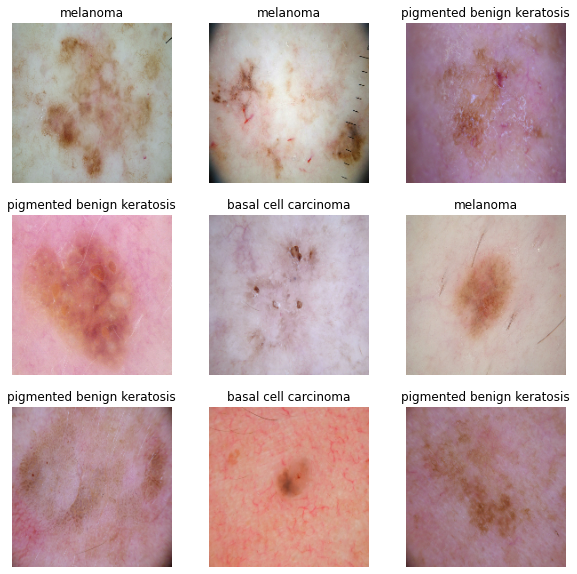

In [14]:
# Visulaizing  the images for each type

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_da.take(2):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")


In [15]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_da = train_da.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_da = val_da.cache().prefetch(buffer_size=AUTOTUNE)

Create a CNN model, which can accurately detect 9 classes present in the dataset. Use layers.experimental.preprocessing.Rescaling to normalize pixel values between (0,1). The RGB channel values are in the [0, 255] range

In [16]:
input_shape = (180,180,3)
num_classes = 9

model = Sequential()
model.add(tf.keras.layers.experimental.preprocessing.Rescaling(1./255, offset=0.0, input_shape=input_shape))
model.add(Conv2D(32, kernel_size=(3, 3), input_shape=input_shape, padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(32, kernel_size=(3, 3)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, kernel_size=(3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, kernel_size=(3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dense(num_classes))
model.add(Activation('softmax'))
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

epochs = 25
batch_size = 32
history = model.fit(train_da, validation_data=val_da, epochs=epochs, batch_size=batch_size)

Epoch 1/25
63/63 [==============================] - 21s 127ms/step - loss: 8.9029 - accuracy: 0.3254 - val_loss: 4.8889 - val_accuracy: 0.1839
Epoch 2/25
63/63 [==============================] - 7s 105ms/step - loss: 2.1554 - accuracy: 0.4162 - val_loss: 24.1782 - val_accuracy: 0.0673
Epoch 3/25
63/63 [==============================] - 7s 105ms/step - loss: 1.5534 - accuracy: 0.4752 - val_loss: 34.4120 - val_accuracy: 0.0045
Epoch 4/25
63/63 [==============================] - 7s 105ms/step - loss: 1.3591 - accuracy: 0.5372 - val_loss: 17.7539 - val_accuracy: 0.1973
Epoch 5/25
63/63 [==============================] - 7s 106ms/step - loss: 1.2364 - accuracy: 0.5670 - val_loss: 13.4173 - val_accuracy: 0.2466
Epoch 6/25
63/63 [==============================] - 7s 106ms/step - loss: 1.0331 - accuracy: 0.6280 - val_loss: 8.3060 - val_accuracy: 0.1794
Epoch 7/25
63/63 [==============================] - 7s 106ms/step - loss: 0.9855 - accuracy: 0.6508 - val_loss: 7.9842 - val_accuracy: 0.3498
E

In [17]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 180, 180, 32)      896       
                                                                 
 activation_8 (Activation)   (None, 180, 180, 32)      0         
                                                                 
 batch_normalization_6 (Batc  (None, 180, 180, 32)     128       
 hNormalization)                                                 
                                                                 
 conv2d_7 (Conv2D)           (None, 178, 178, 32)      9248      
                                                                 
 activation_9 (Activation)   (None, 178, 178, 32)      0         
                                                      

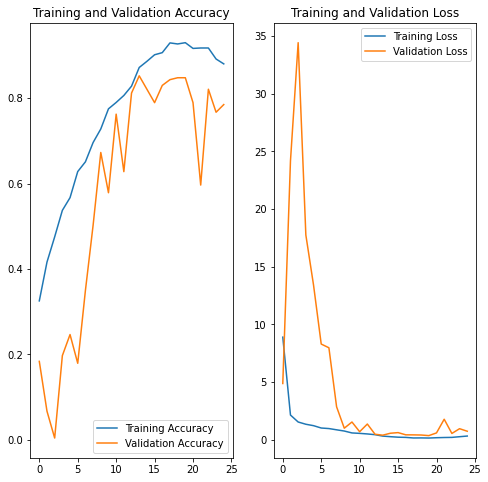

In [18]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

The accuracy of the model for the Training data set is at 92%. But the Validation accuracy is not in par with the training accuracy. It is only at 40%.

Model 2
Removing Batch Normalization and Adding Dropouts.

In [19]:
input_shape = (180,180,3)
num_classes = 9

model = Sequential()
model.add(tf.keras.layers.experimental.preprocessing.Rescaling(1./255, offset=0.0, input_shape=input_shape))
model.add(Conv2D(32, kernel_size=(3, 3), input_shape=input_shape, padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(32, kernel_size=(3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.50))

model.add(Conv2D(64, kernel_size=(3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.50))

model.add(Conv2D(128, kernel_size=(3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.50))

model.add(Flatten())
#model.add(Dense(512, kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.50))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

epochs = 20
batch_size = 32
history = model.fit(train_da, validation_data=val_da, epochs=epochs, batch_size=batch_size)

Epoch 1/20
63/63 [==============================] - 7s 100ms/step - loss: 2.0800 - accuracy: 0.1989 - val_loss: 1.9671 - val_accuracy: 0.1704
Epoch 2/20
63/63 [==============================] - 6s 89ms/step - loss: 1.9886 - accuracy: 0.2406 - val_loss: 1.8619 - val_accuracy: 0.3004
Epoch 3/20
63/63 [==============================] - 6s 89ms/step - loss: 1.8255 - accuracy: 0.3294 - val_loss: 1.7048 - val_accuracy: 0.3857
Epoch 4/20
63/63 [==============================] - 6s 89ms/step - loss: 1.7370 - accuracy: 0.3542 - val_loss: 1.6951 - val_accuracy: 0.3587
Epoch 5/20
63/63 [==============================] - 6s 89ms/step - loss: 1.7102 - accuracy: 0.3735 - val_loss: 1.5858 - val_accuracy: 0.4215
Epoch 6/20
63/63 [==============================] - 6s 89ms/step - loss: 1.6803 - accuracy: 0.3953 - val_loss: 1.6873 - val_accuracy: 0.3991
Epoch 7/20
63/63 [==============================] - 6s 89ms/step - loss: 1.6429 - accuracy: 0.3953 - val_loss: 1.6255 - val_accuracy: 0.3901
Epoch 8/20
6

In [20]:
model.save('/content/gdrive/MyDrive/Ankit_Project')

INFO:tensorflow:Assets written to: /content/gdrive/MyDrive/Ankit_Project/assets


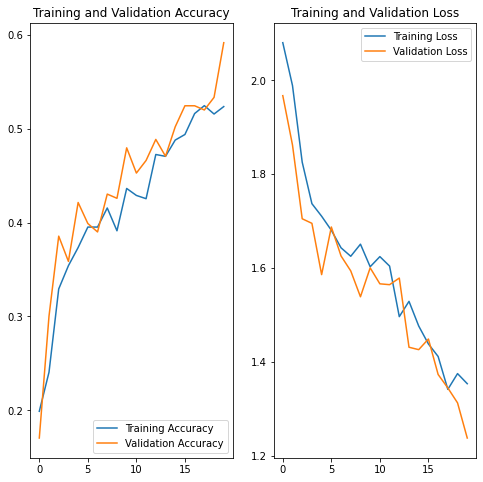

In [21]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

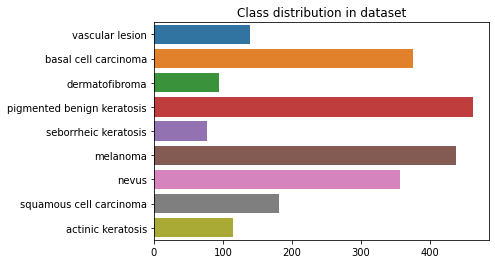

In [26]:
import seaborn as sns

dic = {}
for root , dirs , files in os.walk('/content/gdrive/MyDrive/Ankit_Project/Train'):
  # print(len(files))
  if len(files):
    class_name = root.split('/')[-1]
    dic[class_name] = len(files)
sns.barplot(y = list(dic.keys()),x = list(dic.values()))
plt.title("Class distribution in dataset")
plt.show()


In [27]:
dic

{'actinic keratosis': 114,
 'basal cell carcinoma': 376,
 'dermatofibroma': 95,
 'melanoma': 438,
 'nevus': 357,
 'pigmented benign keratosis': 462,
 'seborrheic keratosis': 77,
 'squamous cell carcinoma': 181,
 'vascular lesion': 139}

Data Augmentation

In [34]:
data_augmentation=tf.keras.Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  layers.experimental.preprocessing.RandomRotation(0.3)
])

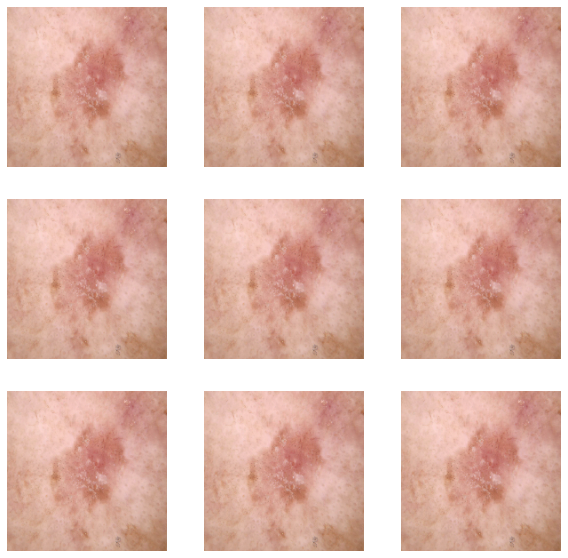

In [36]:
image, label = next(iter(train_da))
image=np.array(image,np.int32)  
plt.figure(figsize=(10, 10))
for i in range(9):
  augmented_image = data_augmentation(image)
  ax = plt.subplot(3, 3, i + 1)
  augmented_image1=np.array(augmented_image[0],np.int32)  
  plt.imshow((augmented_image1))
  plt.axis("off")

In [37]:
input_shape = (180,180,3)
num_classes = 9

model_aug = Sequential()
model_aug.add(tf.keras.layers.experimental.preprocessing.Rescaling(1./255, offset=0.0))
model_aug.add(tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"))
model_aug.add(tf.keras.layers.experimental.preprocessing.RandomRotation(0.2))
model_aug.add(Conv2D(32, kernel_size=(3, 3), input_shape=input_shape, padding='same'))
model_aug.add(Activation('relu'))
model_aug.add(Conv2D(32, kernel_size=(3, 3)))
model_aug.add(Activation('relu'))
model_aug.add(MaxPooling2D(pool_size=(2, 2)))
model_aug.add(Dropout(0.50))

model_aug.add(Conv2D(64, kernel_size=(3, 3), padding='same'))
model_aug.add(Activation('relu'))
model_aug.add(Conv2D(64, (3, 3)))
model_aug.add(Activation('relu'))
model_aug.add(MaxPooling2D(pool_size=(2, 2)))
model_aug.add(Dropout(0.50))

model_aug.add(Conv2D(128, kernel_size=(3, 3), padding='same'))
model_aug.add(Activation('relu'))
model_aug.add(Conv2D(128, (3, 3)))
model_aug.add(Activation('relu'))
model_aug.add(MaxPooling2D(pool_size=(2, 2)))
model_aug.add(Dropout(0.50))

model_aug.add(Flatten())
model_aug.add(Dense(512))
model_aug.add(Activation('relu'))
model_aug.add(Dropout(0.50))
model_aug.add(Dense(num_classes))
model_aug.add(Activation('softmax'))

In [38]:
model_aug.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

epochs = 20
batch_size = 32
history = model_aug.fit(train_da, validation_data=val_da, epochs=epochs, batch_size=batch_size)

Epoch 1/20
63/63 [==============================] - 8s 96ms/step - loss: 2.3769 - accuracy: 0.1964 - val_loss: 2.0258 - val_accuracy: 0.2556
Epoch 2/20
63/63 [==============================] - 6s 94ms/step - loss: 2.0229 - accuracy: 0.2093 - val_loss: 1.9779 - val_accuracy: 0.1704
Epoch 3/20
63/63 [==============================] - 6s 94ms/step - loss: 2.0316 - accuracy: 0.1870 - val_loss: 1.9813 - val_accuracy: 0.2556
Epoch 4/20
63/63 [==============================] - 6s 94ms/step - loss: 2.0239 - accuracy: 0.1935 - val_loss: 1.9692 - val_accuracy: 0.2556
Epoch 5/20
63/63 [==============================] - 6s 97ms/step - loss: 2.0218 - accuracy: 0.1944 - val_loss: 1.9689 - val_accuracy: 0.2556
Epoch 6/20
63/63 [==============================] - 6s 95ms/step - loss: 2.0221 - accuracy: 0.1969 - val_loss: 1.9673 - val_accuracy: 0.2556
Epoch 7/20
63/63 [==============================] - 6s 95ms/step - loss: 2.0202 - accuracy: 0.1910 - val_loss: 1.9685 - val_accuracy: 0.2556
Epoch 8/20
63

In [39]:
model_aug.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_4 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 random_flip_4 (RandomFlip)  (None, 180, 180, 3)       0         
                                                                 
 random_rotation_5 (RandomRo  (None, 180, 180, 3)      0         
 tation)                                                         
                                                                 
 conv2d_24 (Conv2D)          (None, 180, 180, 32)      896       
                                                                 
 activation_32 (Activation)  (None, 180, 180, 32)      0         
                                                                 
 conv2d_25 (Conv2D)          (None, 178, 178, 32)      9248      
                                                      

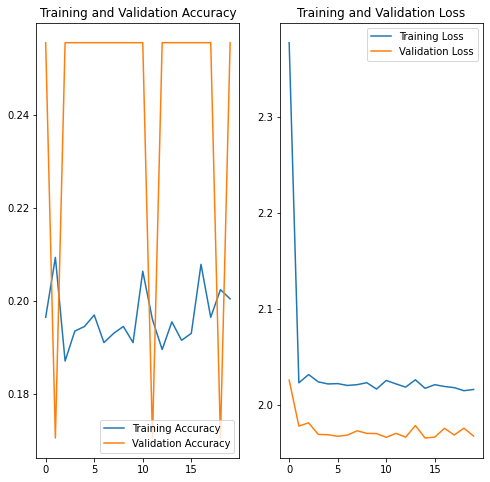

In [40]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [41]:
train_path = "/content/gdrive/MyDrive/Ankit_Project/Train/"
test_path = "/content/gdrive/MyDrive/Ankit_Project/Test/"

In [42]:
for i in class_names:
    directory =train_path + i + '/'
    class_directory = pathlib.Path(directory)
    length=len(list(class_directory.glob('*.jpg')))
    print(f'{i} has {length} samples.')

actinic keratosis has 114 samples.
basal cell carcinoma has 376 samples.
dermatofibroma has 95 samples.
melanoma has 438 samples.
nevus has 357 samples.
pigmented benign keratosis has 462 samples.
seborrheic keratosis has 77 samples.
squamous cell carcinoma has 181 samples.
vascular lesion has 139 samples.


In [43]:
!pip install Augmentor

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [44]:
path_to_training_dataset=train_path
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 114 image(s) found.
Output directory set to /content/gdrive/MyDrive/Ankit_Project/Train/actinic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FB157571110>: 100%|██████████| 500/500 [00:21<00:00, 23.05 Samples/s]


Initialised with 376 image(s) found.
Output directory set to /content/gdrive/MyDrive/Ankit_Project/Train/basal cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FB157DFC590>: 100%|██████████| 500/500 [00:25<00:00, 19.31 Samples/s]


Initialised with 95 image(s) found.
Output directory set to /content/gdrive/MyDrive/Ankit_Project/Train/dermatofibroma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FB1FDA3E2D0>: 100%|██████████| 500/500 [00:22<00:00, 22.64 Samples/s]


Initialised with 438 image(s) found.
Output directory set to /content/gdrive/MyDrive/Ankit_Project/Train/melanoma/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7FB1F00B0BD0>: 100%|██████████| 500/500 [01:37<00:00,  5.14 Samples/s]


Initialised with 357 image(s) found.
Output directory set to /content/gdrive/MyDrive/Ankit_Project/Train/nevus/output.

Processing <PIL.Image.Image image mode=RGB size=1007x711 at 0x7FB1F006E110>: 100%|██████████| 500/500 [01:20<00:00,  6.19 Samples/s]


Initialised with 462 image(s) found.
Output directory set to /content/gdrive/MyDrive/Ankit_Project/Train/pigmented benign keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FB1FDB5EA10>: 100%|██████████| 500/500 [00:19<00:00, 25.38 Samples/s]


Initialised with 77 image(s) found.
Output directory set to /content/gdrive/MyDrive/Ankit_Project/Train/seborrheic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7FB1FD83C2D0>: 100%|██████████| 500/500 [00:44<00:00, 11.25 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/gdrive/MyDrive/Ankit_Project/Train/squamous cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FB1FDA48ED0>: 100%|██████████| 500/500 [00:19<00:00, 25.52 Samples/s]


Initialised with 139 image(s) found.
Output directory set to /content/gdrive/MyDrive/Ankit_Project/Train/vascular lesion/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7FB156F6F910>: 100%|██████████| 500/500 [00:19<00:00, 25.64 Samples/s]


In [45]:
image_count_train = len(list(train_data.glob('*/output/*.jpg')))
print(image_count_train)

4500


In [46]:
from glob import glob
path_list = [x for x in glob(os.path.join(train_data, '*','output', '*.jpg'))]

In [48]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(train_data, '*','output', '*.jpg'))]

In [49]:
dataframe_dict_new = dict(zip(path_list, lesion_list_new))

In [51]:
for i in class_names:
    directory =train_path+i+'/'
    directory_out =train_path+i+'/output/'
    class_directory = pathlib.Path(directory)
    class_directory_out = pathlib.Path(directory_out)
    length=len(list(class_directory.glob('*.jpg')))
    length_out=len(list(class_directory_out.glob('*.jpg')))
    length_tot=length+length_out
    print(f'{i} has {length_tot} samples.')

actinic keratosis has 614 samples.
basal cell carcinoma has 876 samples.
dermatofibroma has 595 samples.
melanoma has 938 samples.
nevus has 857 samples.
pigmented benign keratosis has 962 samples.
seborrheic keratosis has 577 samples.
squamous cell carcinoma has 681 samples.
vascular lesion has 639 samples.


In [52]:
batch_size = 32
height = 180
width = 180

In [55]:
data_dir_train=train_path
train_da = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123, label_mode='categorical',
  validation_split = 0.2,
  subset = 'training',
  image_size=(height, width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.
